In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Introduction to Scikit-Learn(sklearn)
0. Scikit-Learn workflow
1. Getting the datra ready
2. Choose the right estimator/algorithm for our problems
3. Fit the model/algorithm and  use it to makle predictions on our data
4. Evaluating the model
5. Improve the model
6. Save and load the trained model
7. Putting it all together

## 1. Getting the data ready

#### Three main things we have to do:
    1. Split the data into features and labels(X and y)
    2. Filling(imputin) or disregarding missing values
    3. Converting non - numerical values to numerical values(d feature encoding )

In [2]:
heart_disease = pd.read_csv("heart-disease.csv")
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [3]:
X=heart_disease.drop("target", axis=1) # axis=1 is all of the column
X

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3


In [4]:
y=heart_disease["target"]
y.head()

0    1
1    1
2    1
3    1
4    1
Name: target, dtype: int64

In [5]:
# Split the data into training and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X,y, test_size=0.2)

In [6]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((242, 13), (61, 13), (242,), (61,))

## CLEAN DATA--> TRANSFORM DATA --> REDUCE DATA

In [7]:
len(heart_disease)

303

#### 1. Make sure that the data is all numerical

In [8]:
car_sales = pd.read_csv("car-sales-extended.csv")
car_sales.head()

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431,4,15323
1,BMW,Blue,192714,5,19943
2,Honda,White,84714,4,28343
3,Toyota,White,154365,4,13434
4,Nissan,Blue,181577,3,14043


In [9]:
len(car_sales)

1000

In [10]:
# Split the data X/y
X=car_sales.drop("Price", axis=1)
y=car_sales["Price"]

#Split into training and test
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2)
from sklearn.ensemble import RandomForestRegressor 
model=RandomForestRegressor()
model.fit(X_train, y_train)
model.score(X_test, y_test)

ValueError: could not convert string to float: 'Toyota'

In [ ]:
# Turn the categories into numbers
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features=["Make", "Colour", "Doors"]
one_hot=OneHotEncoder()
transformer= ColumnTransformer([("one_hot", one_hot, categorical_features)],
                              remainder="passthrough")
transformed_X=transformer.fit_transform(X)
transformed_X

In [ ]:
X.head()

In [ ]:
pd.DataFrame(transformed_X)

In [ ]:
dummies=pd.get_dummies(car_sales[["Make", "Colour", "Doors"]])
dummies

In [ ]:
# let's refit the model
np.random.seed(42)
X_train, X_test, y_train, y_test= train_test_split(transformed_X, y,
                                                      test_size=0.2)
model.fit(X_train, y_train)

In [11]:
model.score(X_test, y_test)

NotFittedError: This RandomForestRegressor instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

### 1.2.  What if there were missing values?
    1.Fill them with some value( aka imputation).
    2.Remove the samples with missing data.

In [12]:
# Import car sales missing data
car_sales_missing=pd.read_csv("car-sales-extended-missing-data.csv")
car_sales_missing.head()

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0


In [13]:
car_sales_missing.isna().sum()

Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

In [14]:
# create X and y
X=car_sales_missing.drop("Price", axis=1)
y=car_sales_missing["Price"]

In [15]:
# let's try and convert data to numbers
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features=["Make", "Colour", "Doors"]
one_hot=OneHotEncoder()
transformer= ColumnTransformer([("one_hot", one_hot, categorical_features)],
                              remainder="passthrough")
transformed_X=transformer.fit_transform(X)
transformed_X

ValueError: Input contains NaN

#### Option 1: Fill missing data with Pandas

In [16]:
car_sales_missing["Doors"].value_counts()

4.0    811
5.0     75
3.0     64
Name: Doors, dtype: int64

In [17]:
car_sales_missing["Make"].fillna("missing", inplace=True)
car_sales_missing["Colour"].fillna("missing", inplace=True)
car_sales_missing["Odometer (KM)"].fillna(car_sales_missing
                                          ["Odometer (KM)"].mean(), 
                                          inplace=True)
car_sales_missing["Doors"].fillna(4, inplace=True)

In [18]:
car_sales_missing.isna().sum()

Make              0
Colour            0
Odometer (KM)     0
Doors             0
Price            50
dtype: int64

In [19]:
# remove rows with missing price value
car_sales_missing.dropna(inplace=True)

In [20]:
car_sales_missing.isna().sum()

Make             0
Colour           0
Odometer (KM)    0
Doors            0
Price            0
dtype: int64

In [21]:
len(car_sales_missing)

950

In [22]:
X=car_sales_missing.drop("Price", axis=1)
y=car_sales_missing["Price"]
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features=["Make", "Colour", "Doors"]
one_hot=OneHotEncoder()
transformer= ColumnTransformer([("one_hot", one_hot, categorical_features)],
                              remainder="passthrough")
transformed_X=transformer.fit_transform(car_sales_missing)
transformed_X

array([[0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        3.54310e+04, 1.53230e+04],
       [1.00000e+00, 0.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        1.92714e+05, 1.99430e+04],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        8.47140e+04, 2.83430e+04],
       ...,
       [0.00000e+00, 0.00000e+00, 1.00000e+00, ..., 0.00000e+00,
        6.66040e+04, 3.15700e+04],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        2.15883e+05, 4.00100e+03],
       [0.00000e+00, 0.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        2.48360e+05, 1.27320e+04]])

#### Option 2: Fill missing Data with Scikit-Learn

In [23]:
 car_sales_missing=pd.read_csv("car-sales-extended-missing-data.csv")

In [24]:
car_sales_missing.head()

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0


In [25]:
car_sales_missing.isna().sum()

Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

In [26]:
# Drop the rows with no labels
car_sales_missing.dropna(subset=["Price"], inplace=True)
car_sales_missing.isna().sum()

Make             47
Colour           46
Odometer (KM)    48
Doors            47
Price             0
dtype: int64

In [27]:
# Split into X and y
X = car_sales_missing.drop("Price", axis=1)
y=car_sales_missing["Price"]

In [28]:
#Fill missing values with Scikit-Learn
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

# Fill categorial values with 'missing' and numerical values with mean
categorical_imputer = SimpleImputer(strategy='constant', 
                                    fill_value='missing')
door_imputer = SimpleImputer(strategy='constant', fill_value=4)
num_imputer = SimpleImputer(strategy='mean')

# Define columns
categorical_features=["Make", "Colour"]
door_features=["Doors"]
num_features = ["Odometer (KM)"]

#Create an imputer(something that fills missing data)
imputer = ColumnTransformer([("categorical_imputer", categorical_imputer, categorical_features),
                            ("door_imputer", door_imputer, door_features),
                            ("num imputer", num_imputer, num_features)])
#Transform the data
filled_X=imputer.fit_transform(X)
filled_X

array([['Honda', 'White', 4.0, 35431.0],
       ['BMW', 'Blue', 5.0, 192714.0],
       ['Honda', 'White', 4.0, 84714.0],
       ...,
       ['Nissan', 'Blue', 4.0, 66604.0],
       ['Honda', 'White', 4.0, 215883.0],
       ['Toyota', 'Blue', 4.0, 248360.0]], dtype=object)

In [29]:
car_sales_filled=pd.DataFrame(filled_X,
                             columns=["Make", "Colour",
                                      "Doors", "Odometet (KM)"])
car_sales_filled.isna().sum()

Make             0
Colour           0
Doors            0
Odometet (KM)    0
dtype: int64

In [30]:
X = car_sales_filled

In [31]:
# Let's try and convert our data to numbers
# Turn the categories into numbers
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features=["Make", "Colour", "Doors"]
one_hot=OneHotEncoder()
transformer= ColumnTransformer([("one_hot", one_hot, categorical_features)],
                              remainder="passthrough")
transformed_X=transformer.fit_transform(car_sales_filled)
transformed_X

<950x15 sparse matrix of type '<class 'numpy.float64'>'
	with 3800 stored elements in Compressed Sparse Row format>

In [32]:
# Now we have our data as numbers and filled (no missing values)
# let's fit a model
np.random.seed(42)
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test= train_test_split(transformed_X,y, 
                                                   test_size=0.2)
model=RandomForestRegressor()
model.fit(X_train, y_train)
model.score(X_test, y_test)


0.21990196728583944

In [33]:
len(car_sales), len(car_sales_filled)

(1000, 950)

## 2. Choosing the right estimator/algorithm for our problem

* Classification - predicting whether a sample is one or another
* Regression - predicting a number
* Step 1. refer back to the map...https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html

![](scikit.png)

### 2.1. Picking a machine learning model for a regression problem

In [34]:
#Import Boston housing dataset
from sklearn.datasets import load_boston
boston=load_boston()
boston

{'data': array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
         4.9800e+00],
        [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
         9.1400e+00],
        [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
         4.0300e+00],
        ...,
        [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         5.6400e+00],
        [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
         6.4800e+00],
        [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         7.8800e+00]]),
 'target': array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
        18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
        15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
        13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
        21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
        35.4, 24.7, 3

In [35]:
boston_df=pd.DataFrame(boston["data"], columns=boston["feature_names"])
boston_df["target"]=pd.Series(boston["target"])
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [36]:
# let's try the Ridge Regression model
np.random.seed(42)
X=boston_df.drop("target", axis=1)
y=boston_df["target"]
from sklearn.linear_model import Ridge
X_train, X_test, y_train, y_test= train_test_split(X,y, 
                                                   test_size=0.2)
model=Ridge()


In [37]:
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.6662221670168521

#### How do we improve this score?


In [38]:
from sklearn.ensemble import RandomForestRegressor

# Setup a random seed
np.random.seed(42)

#Creat data
X=boston_df.drop("target", axis=1)
y=boston_df["target"]

#Split the data
X_train, X_test, y_train, y_test=train_test_split(X, y,
                                                 test_size=0.2)
#Instantiate Radnom forest

rf=RandomForestRegressor()
rf.fit(X_train, y_train)

#Evaluate the Random forest Regressor
rf.score(X_test, y_test)

0.8654448653350507

In [39]:
# Check the Ridge Model again
model.score(X_test, y_test)

0.6662221670168521

### 2.2. Choosing a classificator for a classification problem

In [40]:
heart_disease=pd.read_csv("heart-disease.csv")
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [41]:
from sklearn.svm import LinearSVC

# Setup a random seed
np.random.seed(42)

#Creat data
X=heart_disease.drop("target", axis=1)
y=heart_disease["target"]

#Split the data
X_train, X_test, y_train, y_test=train_test_split(X, y,
                                                 test_size=0.2)
#Instantiate Linear forest

clf=LinearSVC()
clf.fit(X_train, y_train)

#Evaluate the Random forest Regressor
clf.score(X_test, y_test)

C:\Users\naturehoodmedia\Desktop\ML\sci\env\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


0.8688524590163934

In [42]:
heart_disease["target"].value_counts()

1    165
0    138
Name: target, dtype: int64

In [43]:
from sklearn.ensemble import RandomForestClassifier

# Setup a random seed
np.random.seed(42)

#Creat data
X=heart_disease.drop("target", axis=1)
y=heart_disease["target"]

#Split the data
X_train, X_test, y_train, y_test=train_test_split(X, y,
                                                 test_size=0.2)
#Instantiate Radnom forest

clf=RandomForestClassifier()
clf.fit(X_train, y_train)

#Evaluate the Random forest Regressor
clf.score(X_test, y_test)

0.8524590163934426

### TIP:
1. If you have structured data, used ensemble methods
2. If you have unstructured data, use deep learning or transfer learning

## 3. Fit the model/algorith and use it to make predictions on our data

### 3.1. Fitting the model to the data

Different names for:

* X = features, features variables, data, columns
* y = labels, targets, target variables

In [44]:
from sklearn.ensemble import RandomForestClassifier

# Setup a random seed
np.random.seed(42)

#Creat data
X=heart_disease.drop("target", axis=1)
y=heart_disease["target"]

#Split the data
X_train, X_test, y_train, y_test=train_test_split(X, y,
                                                 test_size=0.2)
#Instantiate Radnom forest

clf=RandomForestClassifier()

#Fit the model to the data
clf.fit(X_train, y_train)

#Evaluate the Random forest Regressor
clf.score(X_test, y_test)

0.8524590163934426

In [45]:
X.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [46]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: target, dtype: int64

### 3.2. Make predictions using a machine learning model
 2 ways to make predictions
 1. PREDICT()- returns the result/label of a single sample
 2. predict_proba()- returns the probability of a gropu of labels

In [50]:
# Usde trained model to make predictions
clf.predict(X_test)

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0], dtype=int64)

In [51]:
np.array(y_test)

array([0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0], dtype=int64)

In [52]:
#Compare predictions to truth labels to evaluate the model 
y_preds=clf.predict(X_test)
np.mean(y_preds==y_test)

0.8524590163934426

In [53]:
clf.score(X_test, y_test)

0.8524590163934426

In [54]:
from sklearn.metrics import accuracy_score

In [55]:
accuracy_score(y_test,y_preds)

0.8524590163934426

In [56]:
# predict_proba returns probabilities of a classification label
clf.predict_proba(X_test[:5])

array([[0.89, 0.11],
       [0.49, 0.51],
       [0.43, 0.57],
       [0.84, 0.16],
       [0.18, 0.82]])

In [57]:
#let's predict() on the same data...
clf.predict(X_test[:5])

array([0, 1, 1, 0, 1], dtype=int64)

In [60]:
# Predict can be used also for regression problems
from sklearn.ensemble import RandomForestRegressor

np.random.seed(42)
X=boston_df.drop("target", axis=1)
y=boston_df["target"]

X_train, X_test, y_train, y_test = train_test_split(X,y,
                                                    test_size=0.2)

model = RandomForestRegressor().fit(X_train, y_train)

y_preds = model.predict(X_test)

In [61]:
y_preds[:10]

array([23.081, 30.574, 16.759, 23.46 , 16.893, 21.644, 19.113, 15.334,
       21.14 , 20.639])

In [63]:
np.array(y_test[:10])

array([23.6, 32.4, 13.6, 22.8, 16.1, 20. , 17.8, 14. , 19.6, 16.8])

In [64]:
# Compare the predictions to the truth
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test, y_preds)

2.136382352941176

## 4. Evaluating machine learning model
Three ways to evaluate Scikit-Learn models/estimatopr
1. Estimator 'score' method
2. The 'scoring parameter'
3. problem-specific metric functions.
### 4.1. Evaluating a model with score method

In [65]:
from sklearn.ensemble import RandomForestClassifier

# Setup a random seed
np.random.seed(42)

#Creat data
X=heart_disease.drop("target", axis=1)
y=heart_disease["target"]

#Split the data
X_train, X_test, y_train, y_test=train_test_split(X, y,
                                                 test_size=0.2)
#Instantiate Radnom forest

clf=RandomForestClassifier()

#Fit the model to the data
clf.fit(X_train, y_train)

#Evaluate the Random forest Regressor
clf.score(X_test, y_test)

0.8524590163934426

In [66]:
from sklearn.ensemble import RandomForestRegressor

np.random.seed(42)
X=boston_df.drop("target", axis=1)
y=boston_df["target"]

X_train, X_test, y_train, y_test = train_test_split(X,y,
                                                    test_size=0.2)

model = RandomForestRegressor().fit(X_train, y_train)

model.score(X_test, y_test)

0.8654448653350507

### 4.2. Evaluating a model with scoring method

In [67]:
from sklearn.model_selection import cross_val_score

from sklearn.ensemble import RandomForestClassifier

# Setup a random seed
np.random.seed(42)

#Creat data
X=heart_disease.drop("target", axis=1)
y=heart_disease["target"]

#Split the data
X_train, X_test, y_train, y_test=train_test_split(X, y,
                                                 test_size=0.2)
#Instantiate Radnom forest

clf=RandomForestClassifier()

#Fit the model to the data
clf.fit(X_train, y_train)

RandomForestClassifier()

In [68]:
clf.score(X_test, y_test)

0.8524590163934426

In [69]:
cross_val_score(clf, X, y)

array([0.81967213, 0.86885246, 0.81967213, 0.78333333, 0.76666667])

In [72]:
np.random.seed(42)
# Single training and test split score
clf_single_score=clf.score(X_test, y_test)

# take the mean of 5-fold cross-validation score
clf_cross_val_score= np.mean(cross_val_score(clf, X, y, scoring=None))

# compare the two

clf_cross_val_score, clf_single_score


(0.8248087431693989, 0.8524590163934426)

### 4.2.1. Classification model evaluation metrics
1. Accuracy
2. Area under ROC curve
3. Confusion matrix
4. Classification report

**Accuracy**

In [73]:
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [75]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

X=heart_disease.drop("target", axis=1)
y=heart_disease["target"]

clf=RandomForestClassifier()
cross_val_score = cross_val_score(clf, X, y)

In [76]:
np.mean(cross_val_score)

0.8248087431693989

In [80]:
print(f"Heart Disease Classifier Cross-Validated Accuracy:{np.mean(cross_val_score) *100:.2f}%")

Heart Disease Classifier Cross-Validated Accuracy:82.48%


**Area under ROC(the receiver operating characteristic curve) curve**

* Area under 
* ROC curve

ROC curves are comparison of a model's true positive rate(tpr) versus a model false positive rate(fpr).
    
* True positive = model predicts 1 when truth is 1
* False positive = model predicts 0 when truth is 1
* True negative = model predicts 0 when the Truth is 0
* False negative = model predicts 1 when truth is 0

In [81]:
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.2)

In [84]:
from sklearn.metrics import roc_curve
clf.fit(X_train, y_train)
y_probs=clf.predict_proba(X_test)
y_probs[:10]

array([[0.58, 0.42],
       [0.09, 0.91],
       [0.55, 0.45],
       [0.75, 0.25],
       [0.52, 0.48],
       [0.09, 0.91],
       [0.3 , 0.7 ],
       [0.98, 0.02],
       [0.14, 0.86],
       [0.39, 0.61]])

In [85]:
y_probs_positive = y_probs[:,1] # Slicing but only the positive of column 1
y_probs_positive[:10]

array([0.42, 0.91, 0.45, 0.25, 0.48, 0.91, 0.7 , 0.02, 0.86, 0.61])

In [93]:
# Calculate fpr,tpr and thresholds
fpr,tpr,thresholds=roc_curve(y_test, y_probs_positive)

# Check the fals positive rates
fpr

array([0.        , 0.        , 0.03448276, 0.03448276, 0.03448276,
       0.03448276, 0.03448276, 0.06896552, 0.06896552, 0.10344828,
       0.10344828, 0.10344828, 0.13793103, 0.13793103, 0.17241379,
       0.17241379, 0.20689655, 0.24137931, 0.24137931, 0.27586207,
       0.27586207, 0.31034483, 0.34482759, 0.34482759, 0.44827586,
       0.44827586, 0.51724138, 0.5862069 , 0.5862069 , 0.75862069,
       0.89655172, 0.93103448, 1.        ])

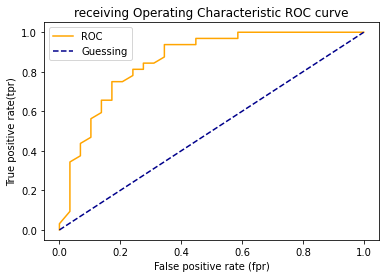

In [94]:
import matplotlib.pyplot as plt

def plot_roc_curve(fpr, tpr):
    """
    Plots a ROC curve given the false positive rate (fpr)
    and true positive rate(tpr) of a model
    """
    plt.plot(fpr, tpr, color="orange", label="ROC")
    
    #Plot line with no predictive power (baseline)
    plt.plot([0,1],[0,1], color="darkblue", linestyle = "--", label="Guessing")
    
    # Customize the plot
    plt.xlabel('False positive rate (fpr)')
    plt.ylabel("True positive rate(tpr)")
    plt.title("receiving Operating Characteristic ROC curve")
    plt.legend()
    plt.show()
    
plot_roc_curve(fpr,tpr)

In [95]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test, y_probs_positive)

0.8561422413793104

**Confusion Matrix**

A confusion matrix is a quick way to compare the label model predicts and the actual labels it was suppoused to predict.
In essence, giving you an idea of where the model is getting confused.

In [96]:
from sklearn.metrics import confusion_matrix

y_preds = clf.predict(X_test)

confusion_matrix(y_test, y_preds)

array([[24,  5],
       [ 8, 24]], dtype=int64)

In [97]:
pd.crosstab(y_test, 
            y_preds, 
            rownames=["Actual Label"], 
            colnames=["Predicted Label"])

Predicted Label,0,1
Actual Label,,
0,24,5
1,8,24


In [ ]:
import sys
!conda install --yes --prefix {sys.prefix} seaborn

In [ ]:
!conda update -n base -c defaults conda

In [ ]:
import seaborn as sns

# Set the font scale
sns.set(font_scale=1.5)

# Create a confusion matrix
conf_mat = confusion_matrix(y_test, y_preds)

# Plot it using Seaborn
sns.heatmap(conf_mat);

In [ ]:

def plot_conf_mat(conf_mat):
    """
    Plots a confusion matrix using Seaborn's heatmap().
    """
    fig, ax = plt.subplots(figsize=(3, 3))
    ax = sns.heatmap(conf_mat,
                     annot=True, # Annotate the boxes 
                     cbar=False)
    plt.xlabel('Predicted label')
    plt.ylabel('True label');

plot_conf_mat(conf_mat)


We've got a bit more information here but... our numbers are looking a little off.

After a little digging, we figure out the version of Matplotlib we're using broke Seaborn plots.

GitHub issue: Heatmaps are being truncated when using with seaborn

But luckily, we found a few potential solutions on Stack Overflow.

Note: The underlying issue here is the version of Matplotlib I'm using (3.1.1) is what's causing the error. By the time you read this, a newer, fixed version may be out.

Since we probably want to make a few confusion matrices, it makes sense to make a function for plotting them.

In [ ]:
def plot_conf_mat(conf_mat):
    """
    Plots a confusion matrix using Seaborn's heatmap().
    """
    fig, ax = plt.subplots(figsize=(3, 3))
    ax = sns.heatmap(conf_mat,
                     annot=True, # Annotate the boxes
                     cbar=False)
    plt.xlabel('Predicted label')
    plt.ylabel('True label')
    
    # Fix the broken annotations (this happened in Matplotlib 3.1.1)
    bottom, top = ax.get_ylim()
    ax.set_ylim(bottom + 0.5, top - 0.5);
    
plot_conf_mat(conf_mat)

In [ ]:
perfect_conf_mat = confusion_matrix(y_test, y_test)
plot_conf_mat(perfect_conf_mat)